## 賃料をlog, 1平米あたりの価格をlightgbmで予測して、あとから面積のlogをたす

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import pickle

In [2]:
df=pd.read_csv('preprocessed_data.csv')
df.head()

,カテゴリ,建物名,築年数,階数,階,賃料,管理費,敷金,礼金,間取り,専有面積,23区,都市名,路線,最寄駅,徒歩
0,賃貸アパート,プチ・ボヌール,4,2,2,148000.0,5000.0,148000.0,148000.0,42DK,48.87,大田区,南蒲田３,京急空港線,糀谷駅,7
1,賃貸一戸建て,荒川戸建,10,3,3,195000.0,0.0,390000.0,195000.0,3SLDK,97.95,荒川区,荒川２,東京メトロ千代田線,町屋駅,5
2,賃貸一戸建て,荒川戸建,10,3,3,195000.0,0.0,390000.0,195000.0,3SLDK,97.95,荒川区,荒川２,東京メトロ千代田線,町屋駅,5
3,賃貸マンション,ティモーネ上野の森ノース,5,11,2,152000.0,10000.0,152000.0,152000.0,2LDK,52.04,荒川区,東日暮里４,ＪＲ山手線,鶯谷駅,6
4,賃貸アパート,東京メトロ日比谷線 三ノ輪駅 3階建 築13年,13,3,3,113000.0,2000.0,113000.0,113000.0,1LDK,43.81,荒川区,南千住５,東京メトロ日比谷線,三ノ輪駅,5


In [3]:
###カテゴリカル変数に変換
df['カテゴリ']=df['カテゴリ'].astype('category') 
df['間取り']=df['間取り'].astype('category')
df['23区']=df['23区'].astype('category')
df['都市名']=df['都市名'].astype('category')
df['路線']=df['路線'].astype('category')
df['最寄駅']=df['最寄駅'].astype('category')

In [9]:
print(10/100)
print(10**np.log10(10/100))
print(10**(np.log10(10)-np.log10(100)))

0.1
0.1
0.1


In [16]:
print((10/100)*100)
print(10**(np.log10(10)-np.log10(100)+np.log10(100)))

10.0
10.0


In [7]:
###賃料のlog
df['log_賃料']=np.log(df['賃料'])

###面積のlog
df['log_面積']=np.log(df['専有面積'])

###1平米あたりの賃料
df['log_賃料/面積']=df['log_賃料']-df['log_面積']

df.head()

,カテゴリ,建物名,築年数,階数,階,賃料,管理費,敷金,礼金,間取り,専有面積,23区,都市名,路線,最寄駅,徒歩,log_賃料,log_面積,log_賃料/面積
0,賃貸アパート,プチ・ボヌール,4,2,2,148000.0,5000.0,148000.0,148000.0,42DK,48.87,大田区,南蒲田３,京急空港線,糀谷駅,7,11.904968,3.889164,8.015804
1,賃貸一戸建て,荒川戸建,10,3,3,195000.0,0.0,390000.0,195000.0,3SLDK,97.95,荒川区,荒川２,東京メトロ千代田線,町屋駅,5,12.180755,4.584457,7.596298
2,賃貸一戸建て,荒川戸建,10,3,3,195000.0,0.0,390000.0,195000.0,3SLDK,97.95,荒川区,荒川２,東京メトロ千代田線,町屋駅,5,12.180755,4.584457,7.596298
3,賃貸マンション,ティモーネ上野の森ノース,5,11,2,152000.0,10000.0,152000.0,152000.0,2LDK,52.04,荒川区,東日暮里４,ＪＲ山手線,鶯谷駅,6,11.931636,3.952013,7.979623
4,賃貸アパート,東京メトロ日比谷線 三ノ輪駅 3階建 築13年,13,3,3,113000.0,2000.0,113000.0,113000.0,1LDK,43.81,荒川区,南千住５,東京メトロ日比谷線,三ノ輪駅,5,11.635143,3.779862,7.855281


In [17]:
print(148000/48.87)
print(np.exp(8.015804))
print(np.exp(8.015804+3.889164))

3028.4428074483326
3028.443287565006
148000.0661935695


In [15]:
df.columns

Index(['カテゴリ', '建物名', '築年数', '階数', '階', '賃料', '管理費', '敷金', '礼金', '間取り', '専有面積',
       '23区', '都市名', '路線', '最寄駅', '徒歩', 'log_賃料', 'log_面積', 'log_賃料/面積'],
      dtype='object')

In [52]:
#目的変数と説明変数に分割
X_columns=['カテゴリ', '築年数', '階数', '階', '管理費', '敷金','礼金','間取り','23区', '都市名', '路線', '最寄駅', '徒歩','log_面積']
y_columns=['log_賃料/面積']

X=df[X_columns]
y=df[y_columns]

In [53]:
X

,カテゴリ,築年数,階数,階,管理費,敷金,礼金,間取り,23区,都市名,路線,最寄駅,徒歩,log_面積
0,賃貸アパート,4,2,2,5000.0,148000.0,148000.0,42DK,大田区,南蒲田３,京急空港線,糀谷駅,7,3.889164
1,賃貸一戸建て,10,3,3,0.0,390000.0,195000.0,3SLDK,荒川区,荒川２,東京メトロ千代田線,町屋駅,5,4.584457
2,賃貸一戸建て,10,3,3,0.0,390000.0,195000.0,3SLDK,荒川区,荒川２,東京メトロ千代田線,町屋駅,5,4.584457
3,賃貸マンション,5,11,2,10000.0,152000.0,152000.0,2LDK,荒川区,東日暮里４,ＪＲ山手線,鶯谷駅,6,3.952013
4,賃貸アパート,13,3,3,2000.0,113000.0,113000.0,1LDK,荒川区,南千住５,東京メトロ日比谷線,三ノ輪駅,5,3.779862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222918,賃貸一戸建て,51,2,2,0.0,168000.0,0.0,3K,江戸川区,江戸川２,都営新宿線,瑞江駅,14,3.967836
222919,賃貸マンション,37,7,7,8000.0,92000.0,92000.0,1DK,豊島区,高田１,東京メトロ副都心線,雑司が谷駅,4,3.259634
222920,賃貸アパート,20,2,1,3000.0,85000.0,85000.0,ワンルーム,品川区,南大井５,京急本線,立会川駅,7,3.352007
222921,賃貸マンション,45,3,3,0.0,75000.0,75000.0,1DK,葛飾区,東新小岩１,ＪＲ総武線,新小岩駅,3,3.413126


In [54]:
#学習用、検証用、テスト用に分割
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test=train_test_split(X, y, test_size=0.2, random_state=20221014)
X_train, X_val, y_train, y_val=train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=20221014)

In [59]:
reg_train=lgb.Dataset(X_train, y_train)
reg_val=lgb.Dataset(X_val, y_val)

In [28]:
"""
OptunaでlightGBM
"""

import lightgbm as lgb
import optuna.integration.lightgbm as lgb_o

params={
    "objective": "regression",
    "metric": "l1",
    "n_estimators": 5000
}

reg_train=lgb.Dataset(X_train, y_train)
reg_val=lgb.Dataset(X_val, y_val)

opt=lgb_o.train(params, reg_train, valid_sets=reg_val, num_boost_round=5000, early_stopping_rounds=100, verbose_eval=False)

[I 2022-10-16 22:40:08,365] A new study created in memory with name: no-name-86de46f4-ec88-4129-8d83-1b9efe7b2f75

feature_fraction, val_score: inf:   0%|                   | 0/7 [00:00<?, ?it/s]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightG

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

feature_fraction, val_score: 0.040850:  14%|8     | 1/7 [00:35<03:33, 35.56s/it][I 2022-10-16 22:40:43,964] Trial 0 finished with value: 0.04085019037004446 and parameters: {'feature_fraction': 0.7}. Best is trial 0 with value: 0.04085019037004446.

feature_fraction, val_score: 0.040850:  14%|8     | 1/7 [00:35<03:33, 35.56s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Sho

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

feature_fraction, val_score: 0.040850:  29%|#7    | 2/7 [01:08<02:50, 34.17s/it][I 2022-10-16 22:41:17,170] Trial 1 finished with value: 0.041812829120189535 and parameters: {'feature_fraction': 0.5}. Best is trial 0 with value: 0.04085019037004446.

feature_fraction, val_score: 0.040850:  29%|#7    | 2/7 [01:08<02:50, 34.17s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Sh

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

feature_fraction, val_score: 0.039651:  43%|##5   | 3/7 [01:49<02:27, 36.98s/it][I 2022-10-16 22:41:57,489] Trial 2 finished with value: 0.0396510983235189 and parameters: {'feature_fraction': 0.8999999999999999}. Best is trial 2 with value: 0.0396510983235189.

feature_fraction, val_score: 0.039651:  43%|##5   | 3/7 [01:49<02:27, 36.98s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

feature_fraction, val_score: 0.039564:  57%|###4  | 4/7 [02:35<02:01, 40.65s/it][I 2022-10-16 22:42:43,782] Trial 3 finished with value: 0.03956437628054033 and parameters: {'feature_fraction': 1.0}. Best is trial 3 with value: 0.03956437628054033.

feature_fraction, val_score: 0.039564:  57%|###4  | 4/7 [02:35<02:01, 40.65s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Sho

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

feature_fraction, val_score: 0.039564:  71%|####2 | 5/7 [03:00<01:09, 34.91s/it][I 2022-10-16 22:43:08,512] Trial 4 finished with value: 0.04448936730451077 and parameters: {'feature_fraction': 0.4}. Best is trial 3 with value: 0.03956437628054033.

feature_fraction, val_score: 0.039564:  71%|####2 | 5/7 [03:00<01:09, 34.91s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Sho

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011930 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

feature_fraction, val_score: 0.039564:  86%|#####1| 6/7 [03:29<00:33, 33.08s/it][I 2022-10-16 22:43:38,043] Trial 5 finished with value: 0.04133912014677118 and parameters: {'feature_fraction': 0.6}. Best is trial 3 with value: 0.03956437628054033.

feature_fraction, val_score: 0.039564:  86%|#####1| 6/7 [03:29<00:33, 33.08s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Sho

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

feature_fraction, val_score: 0.039564: 100%|######| 7/7 [04:02<00:00, 34.71s/it]

num_leaves, val_score: 0.039564:   0%|                   | 0/20 [00:00<?, ?it/s]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future re

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

num_leaves, val_score: 0.028803:   5%|5         | 1/20 [01:49<34:39, 109.45s/it][I 2022-10-16 22:46:00,815] Trial 7 finished with value: 0.028802530134299068 and parameters: {'num_leaves': 209}. Best is trial 7 with value: 0.028802530134299068.

num_leaves, val_score: 0.028803:   5%|5         | 1/20 [01:49<34:39, 109.45s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

num_leaves, val_score: 0.028803:  10%|#         | 2/20 [03:42<33:28, 111.58s/it][I 2022-10-16 22:47:53,934] Trial 8 finished with value: 0.0291699431935417 and parameters: {'num_leaves': 190}. Best is trial 7 with value: 0.028802530134299068.

num_leaves, val_score: 0.028803:  10%|#         | 2/20 [03:42<33:28, 111.58s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-012

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

num_leaves, val_score: 0.028803:  15%|#6         | 3/20 [04:17<21:40, 76.53s/it][I 2022-10-16 22:48:28,739] Trial 9 finished with value: 0.041092803800937924 and parameters: {'num_leaves': 25}. Best is trial 7 with value: 0.028802530134299068.

num_leaves, val_score: 0.028803:  15%|#6         | 3/20 [04:17<21:40, 76.53s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-01

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

num_leaves, val_score: 0.028803:  20%|##2        | 4/20 [05:13<18:15, 68.45s/it][I 2022-10-16 22:49:24,803] Trial 10 finished with value: 0.034051298730844615 and parameters: {'num_leaves': 72}. Best is trial 7 with value: 0.028802530134299068.

num_leaves, val_score: 0.028803:  20%|##2        | 4/20 [05:13<18:15, 68.45s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002673 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

num_leaves, val_score: 0.028635:  25%|##7        | 5/20 [07:06<21:07, 84.50s/it][I 2022-10-16 22:51:17,758] Trial 11 finished with value: 0.028635065667939736 and parameters: {'num_leaves': 222}. Best is trial 11 with value: 0.028635065667939736.

num_leaves, val_score: 0.028635:  25%|##7        | 5/20 [07:06<21:07, 84.50s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

num_leaves, val_score: 0.028635:  30%|###3       | 6/20 [07:33<15:07, 64.84s/it][I 2022-10-16 22:51:44,420] Trial 12 finished with value: 0.04985133147148757 and parameters: {'num_leaves': 8}. Best is trial 11 with value: 0.028635065667939736.

num_leaves, val_score: 0.028635:  30%|###3       | 6/20 [07:33<15:07, 64.84s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-01

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

num_leaves, val_score: 0.028635:  35%|###8       | 7/20 [09:22<17:14, 79.55s/it][I 2022-10-16 22:53:34,297] Trial 13 finished with value: 0.029033872852483423 and parameters: {'num_leaves': 198}. Best is trial 11 with value: 0.028635065667939736.

num_leaves, val_score: 0.028635:  35%|###8       | 7/20 [09:22<17:14, 79.55s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

num_leaves, val_score: 0.028635:  40%|####4      | 8/20 [09:52<12:44, 63.70s/it][I 2022-10-16 22:54:04,037] Trial 14 finished with value: 0.04985133147148757 and parameters: {'num_leaves': 8}. Best is trial 11 with value: 0.028635065667939736.

num_leaves, val_score: 0.028635:  40%|####4      | 8/20 [09:52<12:44, 63.70s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-01

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

num_leaves, val_score: 0.028635:  45%|####9      | 9/20 [11:28<13:31, 73.78s/it][I 2022-10-16 22:55:39,991] Trial 15 finished with value: 0.02934756377077591 and parameters: {'num_leaves': 176}. Best is trial 11 with value: 0.028635065667939736.

num_leaves, val_score: 0.028635:  45%|####9      | 9/20 [11:28<13:31, 73.78s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

num_leaves, val_score: 0.028635:  50%|#####     | 10/20 [11:58<10:01, 60.10s/it][I 2022-10-16 22:56:09,501] Trial 16 finished with value: 0.045813799888883455 and parameters: {'num_leaves': 13}. Best is trial 11 with value: 0.028635065667939736.

num_leaves, val_score: 0.028635:  50%|#####     | 10/20 [11:58<10:01, 60.10s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

num_leaves, val_score: 0.028157:  55%|#####5    | 11/20 [13:53<11:34, 77.14s/it][I 2022-10-16 22:58:05,187] Trial 17 finished with value: 0.028157293962379964 and parameters: {'num_leaves': 252}. Best is trial 17 with value: 0.028157293962379964.

num_leaves, val_score: 0.028157:  55%|#####5    | 11/20 [13:53<11:34, 77.14s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

num_leaves, val_score: 0.028157:  60%|######    | 12/20 [15:57<12:09, 91.15s/it][I 2022-10-16 23:00:08,448] Trial 18 finished with value: 0.02819284080358213 and parameters: {'num_leaves': 255}. Best is trial 17 with value: 0.028157293962379964.

num_leaves, val_score: 0.028157:  60%|######    | 12/20 [15:57<12:09, 91.15s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

num_leaves, val_score: 0.028157:  65%|#####8   | 13/20 [17:58<11:41, 100.19s/it][I 2022-10-16 23:02:09,435] Trial 19 finished with value: 0.028440286488681084 and parameters: {'num_leaves': 239}. Best is trial 17 with value: 0.028157293962379964.

num_leaves, val_score: 0.028157:  65%|#####8   | 13/20 [17:58<11:41, 100.19s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

num_leaves, val_score: 0.028157:  70%|#######   | 14/20 [19:16<09:22, 93.73s/it][I 2022-10-16 23:03:28,212] Trial 20 finished with value: 0.030480396727026817 and parameters: {'num_leaves': 139}. Best is trial 17 with value: 0.028157293962379964.

num_leaves, val_score: 0.028157:  70%|#######   | 14/20 [19:16<09:22, 93.73s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

num_leaves, val_score: 0.028157:  75%|#######5  | 15/20 [21:07<08:14, 98.84s/it][I 2022-10-16 23:05:18,920] Trial 21 finished with value: 0.0282487887614593 and parameters: {'num_leaves': 247}. Best is trial 17 with value: 0.028157293962379964.

num_leaves, val_score: 0.028157:  75%|#######5  | 15/20 [21:07<08:14, 98.84s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

num_leaves, val_score: 0.028157:  80%|########  | 16/20 [22:36<06:23, 95.82s/it][I 2022-10-16 23:06:47,708] Trial 22 finished with value: 0.030171448845087715 and parameters: {'num_leaves': 149}. Best is trial 17 with value: 0.028157293962379964.

num_leaves, val_score: 0.028157:  80%|########  | 16/20 [22:36<06:23, 95.82s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

num_leaves, val_score: 0.028157:  85%|#######6 | 17/20 [24:42<05:14, 104.99s/it][I 2022-10-16 23:08:54,020] Trial 23 finished with value: 0.02826853095811349 and parameters: {'num_leaves': 256}. Best is trial 17 with value: 0.028157293962379964.

num_leaves, val_score: 0.028157:  85%|#######6 | 17/20 [24:42<05:14, 104.99s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

num_leaves, val_score: 0.028157:  90%|######### | 18/20 [25:54<03:10, 95.08s/it][I 2022-10-16 23:10:06,027] Trial 24 finished with value: 0.032079014433541074 and parameters: {'num_leaves': 102}. Best is trial 17 with value: 0.028157293962379964.

num_leaves, val_score: 0.028157:  90%|######### | 18/20 [25:54<03:10, 95.08s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

num_leaves, val_score: 0.028157:  95%|########5| 19/20 [29:07<02:04, 124.41s/it][I 2022-10-16 23:13:18,931] Trial 25 finished with value: 0.02957652597803912 and parameters: {'num_leaves': 170}. Best is trial 17 with value: 0.028157293962379964.

num_leaves, val_score: 0.028157:  95%|########5| 19/20 [29:07<02:04, 124.41s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

num_leaves, val_score: 0.028157: 100%|##########| 20/20 [31:40<00:00, 95.01s/it]

bagging, val_score: 0.028157:   0%|                      | 0/10 [00:00<?, ?it/s]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future re

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

bagging, val_score: 0.028157:  10%|#1         | 1/10 [10:39<1:35:53, 639.32s/it][I 2022-10-16 23:26:31,080] Trial 27 finished with value: 0.031694174426869316 and parameters: {'bagging_fraction': 0.4094606780339006, 'bagging_freq': 4}. Best is trial 27 with value: 0.031694174426869316.

bagging, val_score: 0.028157:  10%|#1         | 1/10 [10:39<1:35:53, 639.32s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will u

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

bagging, val_score: 0.028157:  20%|##2        | 2/10 [17:11<1:05:53, 494.18s/it][I 2022-10-16 23:33:03,609] Trial 28 finished with value: 0.02843670272225509 and parameters: {'bagging_fraction': 0.9949367917989664, 'bagging_freq': 5}. Best is trial 28 with value: 0.02843670272225509.

bagging, val_score: 0.028157:  20%|##2        | 2/10 [17:12<1:05:53, 494.18s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

bagging, val_score: 0.028157:  30%|###3       | 3/10 [30:13<1:12:58, 625.43s/it][I 2022-10-16 23:46:05,260] Trial 29 finished with value: 0.029887273372998627 and parameters: {'bagging_fraction': 0.8176068416140949, 'bagging_freq': 4}. Best is trial 28 with value: 0.02843670272225509.

bagging, val_score: 0.028157:  30%|###3       | 3/10 [30:13<1:12:58, 625.43s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will us

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023714 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

bagging, val_score: 0.028157:  40%|####4      | 4/10 [41:35<1:04:47, 647.95s/it][I 2022-10-16 23:57:27,758] Trial 30 finished with value: 0.03100490871530509 and parameters: {'bagging_fraction': 0.4751961956150638, 'bagging_freq': 1}. Best is trial 28 with value: 0.02843670272225509.

bagging, val_score: 0.028157:  40%|####4      | 4/10 [41:36<1:04:47, 647.95s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

bagging, val_score: 0.028157:  50%|######5      | 5/10 [53:19<55:40, 668.13s/it][I 2022-10-17 00:09:11,748] Trial 31 finished with value: 0.03135338215027554 and parameters: {'bagging_fraction': 0.4397136007953585, 'bagging_freq': 6}. Best is trial 28 with value: 0.02843670272225509.

bagging, val_score: 0.028157:  50%|######5      | 5/10 [53:20<55:40, 668.13s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

bagging, val_score: 0.028157:  60%|######6    | 6/10 [1:04:29<44:34, 668.72s/it][I 2022-10-17 00:20:21,572] Trial 32 finished with value: 0.031379286210816565 and parameters: {'bagging_fraction': 0.44788543861917623, 'bagging_freq': 3}. Best is trial 28 with value: 0.02843670272225509.

bagging, val_score: 0.028157:  60%|######6    | 6/10 [1:04:29<44:34, 668.72s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will u

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

bagging, val_score: 0.028157:  70%|#######7   | 7/10 [1:12:29<30:20, 606.96s/it][I 2022-10-17 00:28:21,308] Trial 33 finished with value: 0.02850713535343782 and parameters: {'bagging_fraction': 0.988492137915828, 'bagging_freq': 7}. Best is trial 28 with value: 0.02843670272225509.

bagging, val_score: 0.028157:  70%|#######7   | 7/10 [1:12:29<30:20, 606.96s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use 

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

bagging, val_score: 0.028157:  80%|########8  | 8/10 [1:24:56<21:42, 651.40s/it][I 2022-10-17 00:40:47,934] Trial 34 finished with value: 0.030692744774425625 and parameters: {'bagging_fraction': 0.625391861653287, 'bagging_freq': 7}. Best is trial 28 with value: 0.02843670272225509.

bagging, val_score: 0.028157:  80%|########8  | 8/10 [1:24:56<21:42, 651.40s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

bagging, val_score: 0.028157:  90%|#########9 | 9/10 [1:36:35<11:06, 666.28s/it][I 2022-10-17 00:52:26,927] Trial 35 finished with value: 0.03138652204058197 and parameters: {'bagging_fraction': 0.4932543993665098, 'bagging_freq': 6}. Best is trial 28 with value: 0.02843670272225509.

bagging, val_score: 0.028157:  90%|#########9 | 9/10 [1:36:35<11:06, 666.28s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028941 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

bagging, val_score: 0.028157: 100%|##########| 10/10 [1:49:18<00:00, 655.85s/it]

feature_fraction_stage2, val_score: 0.028157:   0%|       | 0/3 [00:00<?, ?it/s]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future re

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

feature_fraction_stage2, val_score: 0.028157:  33%|3| 1/3 [04:23<08:47, 263.80s/[I 2022-10-17 01:09:34,031] Trial 37 finished with value: 0.02826394695884497 and parameters: {'feature_fraction': 0.9520000000000001}. Best is trial 37 with value: 0.02826394695884497.

feature_fraction_stage2, val_score: 0.028157:  33%|3| 1/3 [04:23<08:47, 263.80s//Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argu

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

feature_fraction_stage2, val_score: 0.028157:  33%|3| 1/3 [08:54<08:47, 263.80s/
feature_fraction_stage2, val_score: 0.028157:  67%|6| 2/3 [08:54<04:27, 267.95s/[I 2022-10-17 01:14:04,876] Trial 38 finished with value: 0.028157293962379964 and parameters: {'feature_fraction': 0.9840000000000001}. Best is trial 38 with value: 0.028157293962379964.

feature_fraction_stage2, val_score: 0.028157:  67%|6| 2/3 [08:54<04:27, 267.95s//Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead 

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

feature_fraction_stage2, val_score: 0.028157:  67%|6| 2/3 [13:30<04:27, 267.95s/
feature_fraction_stage2, val_score: 0.028157: 100%|#| 3/3 [13:30<00:00, 271.53s/[I 2022-10-17 01:18:40,670] Trial 39 finished with value: 0.02826394695884497 and parameters: {'feature_fraction': 0.92}. Best is trial 38 with value: 0.028157293962379964.
feature_fraction_stage2, val_score: 0.028157: 100%|#| 3/3 [13:30<00:00, 270.19s/

regularization_factors, val_score: 0.028157:   0%|       | 0/20 [00:00<?, ?it/s]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177:

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

regularization_factors, val_score: 0.028157:   5%| | 1/20 [04:40<1:28:53, 280.70[I 2022-10-17 01:23:21,494] Trial 40 finished with value: 0.02818267867167678 and parameters: {'lambda_l1': 0.0003861260692083383, 'lambda_l2': 0.00014076971804034778}. Best is trial 40 with value: 0.02818267867167678.

regularization_factors, val_score: 0.028157:   5%| | 1/20 [04:40<1:28:53, 280.70/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in pa

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

regularization_factors, val_score: 0.028157:   5%| | 1/20 [09:30<1:28:53, 280.70
regularization_factors, val_score: 0.028157:  10%|1| 2/20 [09:30<1:25:49, 286.06[I 2022-10-17 01:28:11,274] Trial 41 finished with value: 0.028211376162364146 and parameters: {'lambda_l1': 3.1231005563929116e-06, 'lambda_l2': 0.0053365513890091}. Best is trial 40 with value: 0.02818267867167678.

regularization_factors, val_score: 0.028157:  10%|1| 2/20 [09:30<1:25:49, 286.06/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

regularization_factors, val_score: 0.028157:  10%|1| 2/20 [14:28<1:25:49, 286.06
regularization_factors, val_score: 0.028157:  15%|1| 3/20 [14:28<1:22:34, 291.44[I 2022-10-17 01:33:09,140] Trial 42 finished with value: 0.02843851571923542 and parameters: {'lambda_l1': 0.02714842786690879, 'lambda_l2': 1.468898894814639e-07}. Best is trial 40 with value: 0.02818267867167678.

regularization_factors, val_score: 0.028157:  15%|1| 3/20 [14:28<1:22:34, 291.44/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in 

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

regularization_factors, val_score: 0.028157:  15%|1| 3/20 [19:31<1:22:34, 291.44
regularization_factors, val_score: 0.028157:  20%|2| 4/20 [19:31<1:18:55, 295.98[I 2022-10-17 01:38:12,070] Trial 43 finished with value: 0.02842103658504037 and parameters: {'lambda_l1': 2.4774362561507782e-06, 'lambda_l2': 1.2519640039966151}. Best is trial 40 with value: 0.02818267867167678.

regularization_factors, val_score: 0.028157:  20%|2| 4/20 [19:31<1:18:55, 295.98/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in 

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017013 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f


regularization_factors, val_score: 0.028157:  20%|2| 4/20 [20:13<1:18:55, 295.98
regularization_factors, val_score: 0.028157:  25%|2| 5/20 [20:13<51:09, 204.64s/[I 2022-10-17 01:38:54,727] Trial 44 finished with value: 0.04686955675461141 and parameters: {'lambda_l1': 5.7207093721570415, 'lambda_l2': 6.055396995364808e-06}. Best is trial 40 with value: 0.02818267867167678.

regularization_factors, val_score: 0.028157:  25%|2| 5/20 [20:14<51:09, 204.64s//Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds'

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

regularization_factors, val_score: 0.028157:  25%|2| 5/20 [25:16<51:09, 204.64s/
regularization_factors, val_score: 0.028157:  30%|3| 6/20 [25:16<55:28, 237.75s/[I 2022-10-17 01:43:56,791] Trial 45 finished with value: 0.028188702709149818 and parameters: {'lambda_l1': 1.1689768212031037e-08, 'lambda_l2': 7.701777291488198e-05}. Best is trial 40 with value: 0.02818267867167678.

regularization_factors, val_score: 0.028157:  30%|3| 6/20 [25:16<55:28, 237.75s//Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators`

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f


regularization_factors, val_score: 0.028157:  30%|3| 6/20 [32:16<55:28, 237.75s/
regularization_factors, val_score: 0.028157:  35%|3| 7/20 [32:16<1:04:26, 297.41[I 2022-10-17 01:50:57,001] Trial 46 finished with value: 0.02901445737346909 and parameters: {'lambda_l1': 0.12154300171489883, 'lambda_l2': 2.101232198969878e-08}. Best is trial 40 with value: 0.02818267867167678.

regularization_factors, val_score: 0.028157:  35%|3| 7/20 [32:16<1:04:26, 297.41/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

regularization_factors, val_score: 0.028157:  35%|3| 7/20 [34:08<1:04:26, 297.41
regularization_factors, val_score: 0.028157:  40%|4| 8/20 [34:08<47:42, 238.55s/[I 2022-10-17 01:52:49,510] Trial 47 finished with value: 0.028325479375496954 and parameters: {'lambda_l1': 0.008983521782611085, 'lambda_l2': 0.025128478615946134}. Best is trial 40 with value: 0.02818267867167678.

regularization_factors, val_score: 0.028157:  40%|4| 8/20 [34:08<47:42, 238.55s//Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

regularization_factors, val_score: 0.028157:  40%|4| 8/20 [36:02<47:42, 238.55s/
regularization_factors, val_score: 0.028157:  45%|4| 9/20 [36:02<36:34, 199.46s/[I 2022-10-17 01:54:43,008] Trial 48 finished with value: 0.02822705172892514 and parameters: {'lambda_l1': 0.0054636044607192106, 'lambda_l2': 0.0016424474070984246}. Best is trial 40 with value: 0.02818267867167678.

regularization_factors, val_score: 0.028157:  45%|4| 9/20 [36:02<36:34, 199.46s//Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` i

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t


regularization_factors, val_score: 0.028157:  45%|4| 9/20 [36:26<36:34, 199.46s/
regularization_factors, val_score: 0.028157:  50%|5| 10/20 [36:26<24:13, 145.35s[I 2022-10-17 01:55:07,181] Trial 49 finished with value: 0.043645572611386824 and parameters: {'lambda_l1': 3.637534672473556, 'lambda_l2': 4.779515266979303e-06}. Best is trial 40 with value: 0.02818267867167678.

regularization_factors, val_score: 0.028157:  50%|5| 10/20 [36:26<24:13, 145.35s/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds'

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

regularization_factors, val_score: 0.028157:  50%|5| 10/20 [38:24<24:13, 145.35s
regularization_factors, val_score: 0.028157:  55%|5| 11/20 [38:24<20:33, 137.08s[I 2022-10-17 01:57:05,524] Trial 50 finished with value: 0.028579692235802583 and parameters: {'lambda_l1': 5.445562002316937e-05, 'lambda_l2': 6.492125500676501}. Best is trial 40 with value: 0.02818267867167678.

regularization_factors, val_score: 0.028157:  55%|5| 11/20 [38:24<20:33, 137.08s/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in p

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

regularization_factors, val_score: 0.028157:  55%|5| 11/20 [40:17<20:33, 137.08s
regularization_factors, val_score: 0.028157:  60%|6| 12/20 [40:17<17:17, 129.65s[I 2022-10-17 01:58:58,169] Trial 51 finished with value: 0.02818278092562288 and parameters: {'lambda_l1': 6.893925078457174e-05, 'lambda_l2': 4.11854306763782e-05}. Best is trial 40 with value: 0.02818267867167678.

regularization_factors, val_score: 0.028157:  60%|6| 12/20 [40:17<17:17, 129.65s/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

regularization_factors, val_score: 0.028157:  60%|6| 12/20 [42:11<17:17, 129.65s
regularization_factors, val_score: 0.028157:  65%|6| 13/20 [42:11<14:34, 124.93s[I 2022-10-17 02:00:52,249] Trial 52 finished with value: 0.028172873853741016 and parameters: {'lambda_l1': 0.00012086708885951924, 'lambda_l2': 6.456991345628802e-05}. Best is trial 52 with value: 0.028172873853741016.

regularization_factors, val_score: 0.028157:  65%|6| 13/20 [42:11<14:34, 124.93s/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

regularization_factors, val_score: 0.028118:  65%|6| 13/20 [44:41<14:34, 124.93s
regularization_factors, val_score: 0.028118:  70%|7| 14/20 [44:41<13:14, 132.42s[I 2022-10-17 02:03:21,937] Trial 53 finished with value: 0.02811822126805488 and parameters: {'lambda_l1': 0.0004986298892955633, 'lambda_l2': 0.13452421124417824}. Best is trial 53 with value: 0.02811822126805488.

regularization_factors, val_score: 0.028118:  70%|7| 14/20 [44:41<13:14, 132.42s/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in 

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

regularization_factors, val_score: 0.028118:  70%|7| 14/20 [46:50<13:14, 132.42s
regularization_factors, val_score: 0.028118:  75%|7| 15/20 [46:50<10:57, 131.51s[I 2022-10-17 02:05:31,378] Trial 54 finished with value: 0.028216676874151622 and parameters: {'lambda_l1': 2.1930334309712304e-06, 'lambda_l2': 0.13548770621205836}. Best is trial 53 with value: 0.02811822126805488.

regularization_factors, val_score: 0.028118:  75%|7| 15/20 [46:50<10:57, 131.51s/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` i

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

regularization_factors, val_score: 0.028118:  75%|7| 15/20 [49:06<10:57, 131.51s
regularization_factors, val_score: 0.028118:  80%|8| 16/20 [49:06<08:51, 132.84s[I 2022-10-17 02:07:47,287] Trial 55 finished with value: 0.028248615403932417 and parameters: {'lambda_l1': 0.0006358526086979411, 'lambda_l2': 0.30264704546705723}. Best is trial 53 with value: 0.02811822126805488.

regularization_factors, val_score: 0.028118:  80%|8| 16/20 [49:06<08:51, 132.84s/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

regularization_factors, val_score: 0.028118:  80%|8| 16/20 [51:33<08:51, 132.84s
regularization_factors, val_score: 0.028118:  85%|8| 17/20 [51:33<06:50, 136.94s[I 2022-10-17 02:10:13,766] Trial 56 finished with value: 0.028207073772288174 and parameters: {'lambda_l1': 7.989589663486184e-08, 'lambda_l2': 0.0010698953834954012}. Best is trial 53 with value: 0.02811822126805488.

regularization_factors, val_score: 0.028118:  85%|8| 17/20 [51:33<06:50, 136.94s/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` 

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011873 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

regularization_factors, val_score: 0.028118:  85%|8| 17/20 [53:25<06:50, 136.94s
regularization_factors, val_score: 0.028118:  90%|9| 18/20 [53:25<04:19, 129.71s[I 2022-10-17 02:12:06,653] Trial 57 finished with value: 0.02817878507712533 and parameters: {'lambda_l1': 2.940535609810444e-05, 'lambda_l2': 0.013243007143607311}. Best is trial 53 with value: 0.02811822126805488.

regularization_factors, val_score: 0.028118:  90%|9| 18/20 [53:25<04:19, 129.71s/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t


regularization_factors, val_score: 0.028118:  90%|9| 18/20 [55:31<04:19, 129.71s
regularization_factors, val_score: 0.028118:  95%|9| 19/20 [55:31<02:08, 128.46s[I 2022-10-17 02:14:12,212] Trial 58 finished with value: 0.03132212405817572 and parameters: {'lambda_l1': 0.3376806639860736, 'lambda_l2': 2.080120564999143e-06}. Best is trial 53 with value: 0.02811822126805488.

regularization_factors, val_score: 0.028118:  95%|9| 19/20 [55:31<02:08, 128.46s/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds'

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

regularization_factors, val_score: 0.028118:  95%|9| 19/20 [57:35<02:08, 128.46s
regularization_factors, val_score: 0.028118: 100%|#| 20/20 [57:35<00:00, 127.21s[I 2022-10-17 02:16:16,485] Trial 59 finished with value: 0.028239904723760333 and parameters: {'lambda_l1': 0.0015870382733373346, 'lambda_l2': 0.06647180496106575}. Best is trial 53 with value: 0.02811822126805488.
regularization_factors, val_score: 0.028118: 100%|#| 20/20 [57:35<00:00, 172.79s

min_data_in_leaf, val_score: 0.028118:   0%|              | 0/5 [00:00<?, ?it/s]/Users/Shota-0128/opt/anaconda3/lib/pyt

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

min_data_in_leaf, val_score: 0.028118:  20%|#    | 1/5 [03:24<13:38, 204.60s/it][I 2022-10-17 02:19:41,333] Trial 60 finished with value: 0.02944757099212087 and parameters: {'min_child_samples': 100}. Best is trial 60 with value: 0.02944757099212087.

min_data_in_leaf, val_score: 0.028118:  20%|#    | 1/5 [03:24<13:38, 204.60s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

min_data_in_leaf, val_score: 0.028118:  40%|##   | 2/5 [06:07<09:00, 180.19s/it][I 2022-10-17 02:22:24,417] Trial 61 finished with value: 0.02906918355183055 and parameters: {'min_child_samples': 50}. Best is trial 61 with value: 0.02906918355183055.

min_data_in_leaf, val_score: 0.028118:  40%|##   | 2/5 [06:07<09:00, 180.19s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/S

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

min_data_in_leaf, val_score: 0.028024:  60%|###  | 3/5 [07:53<04:52, 146.11s/it][I 2022-10-17 02:24:09,980] Trial 62 finished with value: 0.028023875569828542 and parameters: {'min_child_samples': 10}. Best is trial 62 with value: 0.028023875569828542.

min_data_in_leaf, val_score: 0.028024:  60%|###  | 3/5 [07:53<04:52, 146.11s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

min_data_in_leaf, val_score: 0.028024:  80%|#### | 4/5 [09:51<02:15, 135.27s/it][I 2022-10-17 02:26:08,616] Trial 63 finished with value: 0.02841094653652706 and parameters: {'min_child_samples': 25}. Best is trial 62 with value: 0.028023875569828542.

min_data_in_leaf, val_score: 0.028024:  80%|#### | 4/5 [09:51<02:15, 135.27s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 11
[LightGBM] [Info] Start training from score 8.126077


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')

min_data_in_leaf, val_score: 0.027554: 100%|#####| 5/5 [11:19<00:00, 135.84s/it]


In [55]:
best_params=opt.params
best_params

{'objective': 'regression',
 'metric': 'l1',
 'feature_pre_filter': False,
 'lambda_l1': 0.0004986298892955633,
 'lambda_l2': 0.13452421124417824,
 'num_leaves': 252,
 'feature_fraction': 1.0,
 'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'min_child_samples': 5,
 'num_iterations': 5000,
 'early_stopping_round': 100,
 'categorical_column': [0, 4, 5, 6, 7, 8]}

In [60]:
lgb_model=lgb.train(best_params, reg_train, valid_sets=[reg_train, reg_val], num_boost_round=10000, verbose_eval=100)

/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4208
[LightGBM] [Info] Number of data points in the train set: 142670, number of used features: 14
[LightGBM] [Info] Start training from score 8.126077
Training until validation scores don't improve for 100 rounds


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[100]	training's l1: 0.0230723	valid_1's l1: 0.031714
[200]	training's l1: 0.0162195	valid_1's l1: 0.0263858
[300]	training's l1: 0.0130783	valid_1's l1: 0.0240105
[400]	training's l1: 0.0110057	valid_1's l1: 0.0224959
[500]	training's l1: 0.00961569	valid_1's l1: 0.0214845
[600]	training's l1: 0.00859537	valid_1's l1: 0.0207415
[700]	training's l1: 0.00774404	valid_1's l1: 0.0201449
[800]	training's l1: 0.00707281	valid_1's l1: 0.0196737
[900]	training's l1: 0.00650448	valid_1's l1: 0.0192774
[1000]	training's l1: 0.00604919	valid_1's l1: 0.0189506
[1100]	training's l1: 0.00566351	valid_1's l1: 0.0186846
[1200]	training's l1: 0.00532862	valid_1's l1: 0.0184549
[1300]	training's l1: 0.0050406	valid_1's l1: 0.0182598
[1400]	training's l1: 0.00476923	valid_1's l1: 0.0180717
[1500]	training's l1: 0.0045157	valid_1's l1: 0.0179027
[1600]	training's l1: 0.00427786	valid_1's l1: 0.017738
[1700]	training's l1: 0.00406871	valid_1's l1: 0.017596
[1800]	training's l1: 0.00387296	valid_1's l1: 0.

In [61]:
from sklearn.metrics import r2_score, mean_absolute_error

pred_train=lgb_model.predict(X_train)
pred_val=lgb_model.predict(X_val)
pred_test=lgb_model.predict(X_test)

,カテゴリ,築年数,階数,階,管理費,敷金,礼金,間取り,23区,都市名,路線,最寄駅,徒歩,log_面積
141151,賃貸マンション,34,6,5,0.0,0.0,0.0,ワンルーム,足立区,綾瀬２,東京メトロ千代田線,綾瀬駅,8,2.833213
131836,賃貸マンション,23,10,5,15000.0,0.0,0.0,1K,文京区,本郷１,ＪＲ総武線,水道橋駅,7,3.047850
19843,賃貸アパート,0,2,2,3000.0,70000.0,0.0,1K,足立区,南花畑２,つくばエクスプレス,六町駅,7,3.043093
14965,賃貸マンション,35,3,1,3000.0,105000.0,0.0,3LDK,江戸川区,中葛西７,東京メトロ東西線,西葛西駅,14,4.158883
95820,賃貸マンション,42,6,2,0.0,140000.0,140000.0,1LDK,目黒区,中根２,東急東横線,都立大学駅,6,3.637323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134287,賃貸マンション,14,7,3,0.0,105000.0,105000.0,ワンルーム,渋谷区,東４,ＪＲ山手線,恵比寿駅,14,3.108614
130340,賃貸マンション,20,10,7,7000.0,81000.0,81000.0,1K,渋谷区,初台１,京王新線,初台駅,3,3.050694
36840,賃貸マンション,17,11,6,10000.0,81000.0,81000.0,1K,品川区,東品川１,京急本線,北品川駅,6,3.030617
14471,賃貸マンション,11,9,6,8000.0,112000.0,112000.0,1K,文京区,湯島２,ＪＲ中央線,御茶ノ水駅,7,3.233567


In [62]:
print("訓練用：　", mean_absolute_error(y_pred=pred_train,y_true=y_train))
print("検証用：　", mean_absolute_error(y_pred=pred_val,y_true=y_val))
print("テスト用：　", mean_absolute_error(y_pred=pred_test,y_true=y_test))
print('決定係数: ', r2_score(y_pred=pred_test,y_true=y_test))

訓練用：　 0.001558061505826427
検証用：　 0.015829387132851428
テスト用：　 0.015310289184351716
決定係数:  0.9804153618160326


In [63]:
#学習用、検証用、テスト用に分割
from sklearn.model_selection import train_test_split

y2=df['log_賃料']
y2_train_val, y2_test=train_test_split(y2, test_size=0.2, random_state=20221014)
y2_train, y2_val=train_test_split(y2_train_val, test_size=0.2, random_state=20221014)

In [64]:
print("訓練用：　", mean_absolute_error(np.exp(y2_train), np.exp(pred_train+X_train['log_面積'])))
print("検証用：　", mean_absolute_error(np.exp(y2_val), np.exp(pred_val+X_val['log_面積'])))
print("テスト用：　", mean_absolute_error(np.exp(y2_test), np.exp(pred_test+X_test['log_面積'])))

訓練用：　 169.4088136089707
検証用：　 1811.5414245294319
テスト用：　 1717.2023317940864


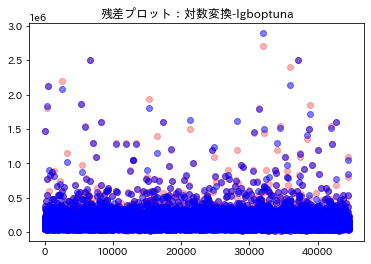

In [65]:
#残差プロット

plt.scatter(x=[i for i in range(len(y2_test))], y=np.exp(y2_test), c='red', alpha=0.3)
plt.scatter(x=[i for i in range(len(y2_test))], y=np.exp(pred_test+X_test['log_面積']), c='blue', alpha=0.5)
plt.title('残差プロット：対数変換-lgboptuna')
plt.savefig('errorplot_lgboptuna_lgb.png')

plt.show()

In [66]:
file = 'lgboptuna_log.pkl'
pickle.dump(lgb_model, open(file, 'wb'))

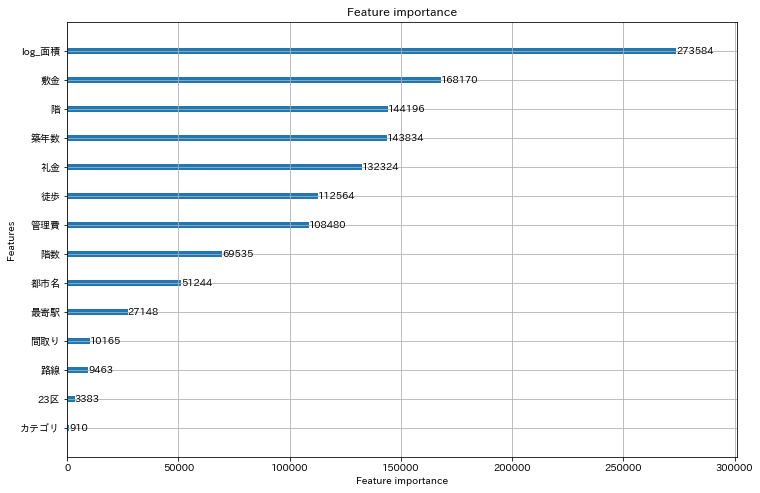

In [67]:
lgb.plot_importance(lgb_model, figsize=(12,8))
plt.savefig('lgboptuna_log.png')
plt.show()